In [2]:
import spacy # fast NLP
import pandas as pd # dataframes
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [3]:
tweetsData = pd.read_csv("all_annotated.tsv", sep = "\t")

In [4]:
tweetsData['Tweet'][0:5]

0                            Bugün bulusmami lazimdiii
1       Volkan konak adami tribe sokar yemin ederim :D
2                                                  Bed
3    I felt my first flash of violence at some fool...
4              Ladies drink and get in free till 10:30
Name: Tweet, dtype: object

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
doc = nlp(' '.join(tweetsData['Tweet']))

In [7]:
sorted(doc, key=len, reverse=True)[0:5]

[a7e78d48888a6811d84e0759e9387647447d1e74d8c7c4f1bec00d318e4e5030f08eb35668a97873820ca1d9dc61ffb620f8992296f3b029a60f153beac8018f5fb77d000000,
 e44337d70d7a7fec79a8b6bd8aa573367224023e4272f22af6d0844d9682d5b48062e331b33ab3b92dac2c262ed4f154ba679ad07b30d2cf1c15851cdac901315b4e72000000,
 3064d36c909f9d437f7a3f405aa550f65529566547ae2308d6c4f2585250106d33b924ae9c8dcc08856e41f611d9bd15409a79f7ba21d318ab484f0cae10017201590a000000,
 69bdf5177f1ae8ed61ed71c477f7dc415b97a2b2d7e57be079feb1a2c52600a996fd0891e130c1ce13c94e4406f83ba59e5edb5a7e0fb45e5251a17bb29601081f3de0000000,
 lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3&lt;3]

In [8]:
sorted(doc, key=len, reverse=True)[6:10]

[卒業したった(*^^*)\n彼女にクラスで一緒にいるやつに\nたった一人の同中の拓夢とも写真撮れたし満足や！(^｡^)時間ギリギリまでテニスやってたからテニス部面と写真撮ってねーわ‼︎まぁこいつらわこれからも付き合いあるだろうからいいか,
 眼鏡は近視用で黒のセルフレームかアンダーリムでお願いします。オフの日は赤いセルフレームです。形状はサークルでお願いします。30代前半です。髪型ボブカットもしくはティモシェンコ元ウクライナ首相みたいなので。色は黒目でとりあえずお願いします,
 普段は写真撮られるの苦手なので、\n\n顔も出さずw\n\n登場回数少ないですが、\n\n元気にampで働いておりますw\n\n一応こんな人が更新してますのでw\n\n#takahiromiyashitathesolois,
 love#instagood#me#cute#tbt#photooftheday#instamood#tweegram#iphonesia#picoftheday#igers#summer#girl#insta]

In [9]:
tweetsData['Tweet'][0:5].apply(langid.classify)

0     (az, -30.30187177658081)
1     (ms, -83.29260611534119)
2      (en, 9.061840057373047)
3    (en, -195.55468368530273)
4     (en, -98.53013229370117)
Name: Tweet, dtype: object

In [10]:
tc = TextCat()

# try to identify the languages of the first five tweets again
tweetsData['Tweet'][0:5].apply(tc.guess_language)

0    tur
1    ind
2    bre
3    eng
4    eng
Name: Tweet, dtype: object

In [11]:
# get the language id for each text
ids_langid = tweetsData['Tweet'].apply(langid.classify)

# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
95
Percent of data in English (estimated):
40.96362597600457


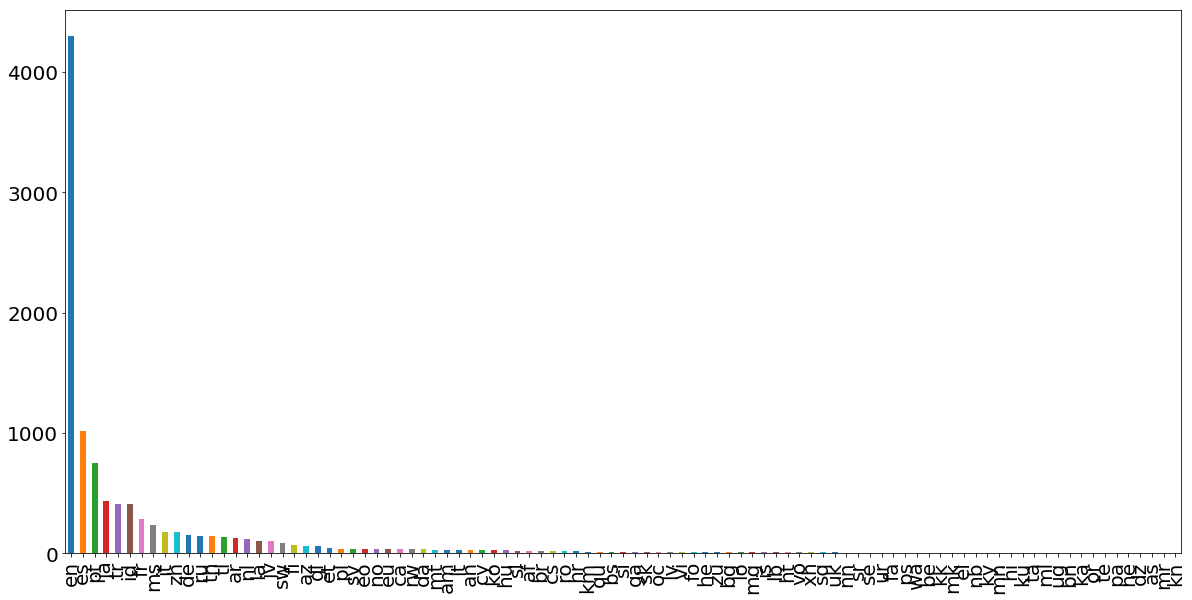

In [12]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Tweet.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [13]:
print("Languages with more than 400 tweets in our dataset:")
print(langs_count[langs_count > 400])

print("")

print("Percent of our dataset in these languages:")
print((sum(langs_count[langs_count > 400])/len(langs)) * 100)

Languages with more than 400 tweets in our dataset:
en    4302
es    1020
pt     751
ja     436
tr     414
id     407
Name: Tweet, dtype: int64

Percent of our dataset in these languages:
69.79622928965912


In [14]:
langs_count


en    4302
es    1020
pt     751
ja     436
tr     414
id     407
fr     282
ms     239
it     182
zh     175
de     156
ru     148
th     147
tl     136
ar     132
nl     117
la     104
jv     103
sw      85
fi      73
az      61
gl      59
et      44
pl      40
sv      39
eo      38
no      36
eu      35
ca      34
rw      33
      ... 
uk       8
nn       7
sr       7
se       7
ur       7
fa       7
ps       5
wa       5
be       4
kk       4
mk       4
el       4
nb       4
ky       4
mn       3
hi       3
ku       3
ta       2
ml       2
ug       2
bn       2
ka       1
or       1
te       1
pa       1
ne       1
dz       1
as       1
mr       1
kn       1
Name: Tweet, Length: 95, dtype: int64

In [15]:
sum(langs_count[langs_count > 400])

7330

In [16]:
len(langs)


10502

In [17]:
import spacy
from spacy.lang.es.examples import sentences 

In [18]:
nlp_es = spacy.load("es_core_news_sm")

In [21]:
spanish_tweets = tweetsData['Tweet'][langs == "es"]
doc_es = nlp_es(' '.join(spanish_tweets))

In [22]:
sorted(doc_es, key=len, reverse=True)[0:5]

[ViernesSantoEnElColiseoRobertoClemente,
 MiFantasia1DEnWembleyConCocaColaFM,
 quimica?\"\n-Nokias\nJajajajaja,
 fortaleciéndonos','escenarios,
 DirectionersConCocaColaFM1D]

In [40]:
from textblob import TextBlob
b = TextBlob("क्या हाल है ?")
b.detect_language()

'hi'

In [54]:

for i in range (5):
    b = TextBlob(tweetsData['Tweet'][i])
    print(b.detect_language())

tr
tr
en
en
en


In [41]:
from langdetect import detect

In [46]:
detect(tweetsData['Tweet'][0])

'tr'

In [45]:
from langdetect import detect_langs
detect_langs("আপনি কেমন আছেন ?")

[bn:0.9999999751049473]